In [1]:
%matplotlib inline

1.Energy in ( x, y )
----

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from scipy.interpolate import griddata

#input timestep
#for input nn=int(sys.argv[1])
nn=150

#read out data file
filename=('../data/ptcls_info_t%3.3d.dat')%(nn)
x,y,z,ang,te=np.loadtxt(filename,usecols=[0,1,2,3,4],unpack=True)

### plot the map  

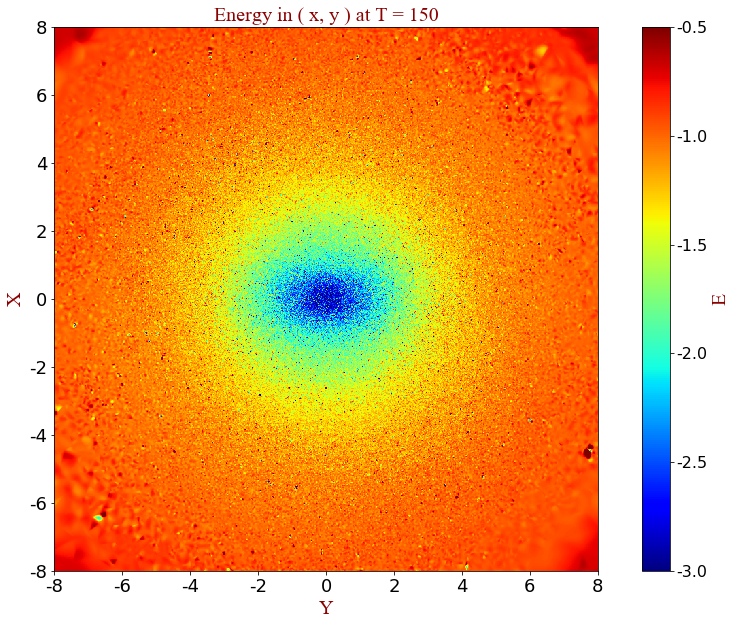

In [3]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#griddata interpolation
grid_x, grid_y = np.mgrid[-8.:8.:0.02, -8:8:0.02]
grid_z = griddata((x,y), te, (grid_x, grid_y), method='cubic')

#colormap
cmap = matplotlib.cm.jet
#extent map into (0, 1)
extent=(0,1,0,1)
#normalization
norm = matplotlib.colors.Normalize(vmin=-3.0, vmax=0.)

#show color map
#contourf #>>>ctf=plt.contourf(grid_x,grid_y,grid_z)
gci=plt.imshow(grid_z.T,extent=extent,origin='lower',cmap=cmap,norm=norm)

#set ticks
ax=plt.gca()
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))
ax.set_yticks(np.linspace(0,1,9))
ax.set_yticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('E',fontdict=font)
cbar.set_ticks(np.linspace(-3.0,0,6))
cbar.set_ticklabels( ('-3.0', '-2.5', '-2.0', '-1.5', '-1.0',  '-0.5',  '0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(-3,0)

#label
ax.set_ylabel('X',fontdict=font)
ax.set_xlabel('Y',fontdict=font)

#title
titleStr='Energy in ( x, y ) at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname1='Te_xy_t'+str(nn)+'.png'
plt.savefig(figname1)

2.Energy ( azimuthally averaged ) vs. R
----

In [4]:
import radialProfile as rad

In [5]:
# calculate azimuthally averaged Energy
nbins = 20
Rmax = 8.
bin_size = Rmax / np.float(nbins)

R = np.linspace(0, Rmax, nbins)
Aza_E = rad.azimuthalAverage(x, y, te, Rmax, bin_size)

20


Text(0.5, 1.0, 'Energy vs. R at T = 150')

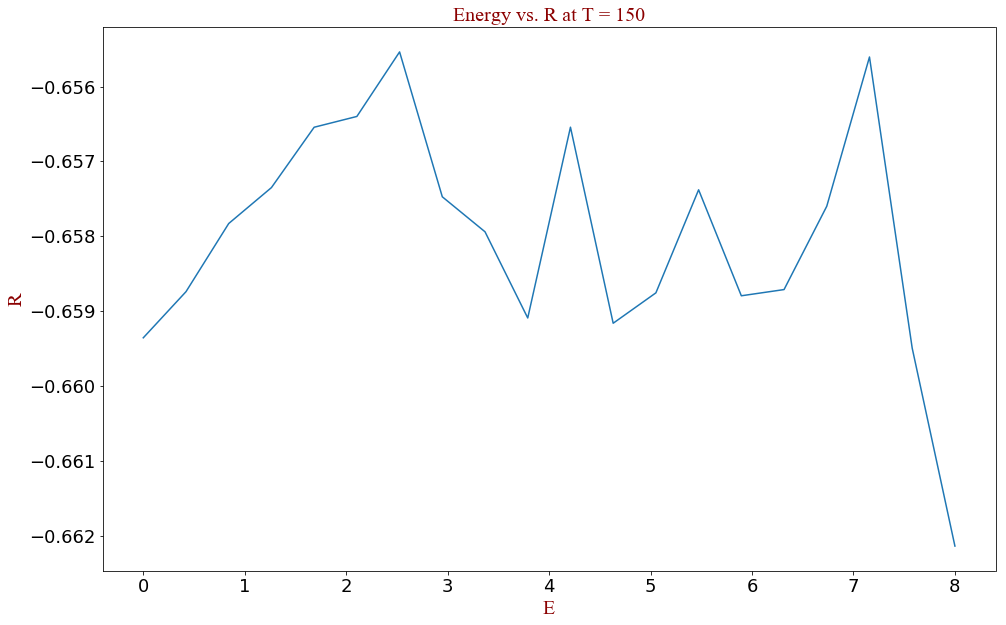

In [6]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

gci=ax.plot(R, Aza_E)

#label
ax = plt.gca()
ax.set_ylabel('R',fontdict=font)
ax.set_xlabel('E',fontdict=font)

#title
titleStr='Energy vs. R at T = '+str(nn)
plt.title(titleStr,fontdict=font)

3.Jacobi energy $E_{J}$ ( $\Omega_{p}$ = 0.542 )  
----

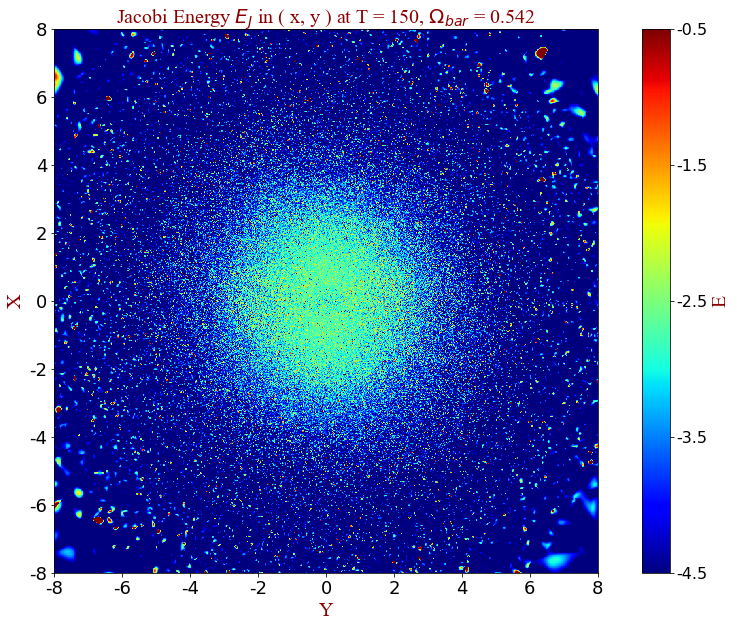

In [7]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#set pattern speed
omega_p = 0.542

#griddata interpolation
grid_x, grid_y = np.mgrid[-8.:8.:0.02, -8:8:0.02]
grid_z = griddata((x,y), (te - omega_p * ang), (grid_x, grid_y), method='cubic')

#colormap
cmap = matplotlib.cm.jet
#extent map into (0, 1)
extent=(0,1,0,1)
#normalization
norm = matplotlib.colors.Normalize(vmin=-5.0, vmax=0.)

#show color map
#contourf #>>>ctf=plt.contourf(grid_x,grid_y,grid_z)
gci=plt.imshow(grid_z.T,extent=extent,origin='lower',cmap=cmap)

#set ticks
ax=plt.gca()
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))
ax.set_yticks(np.linspace(0,1,9))
ax.set_yticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('E',fontdict=font)
cbar.set_ticks(np.linspace(-4.5,-0.5,5))
cbar.set_ticklabels( ('-4.5', '-3.5', '-2.5', '-1.5', '-0.5'))
cbar.ax.tick_params(labelsize=16)
plt.clim(-4.5,-0.5)

#label
ax.set_ylabel('X',fontdict=font)
ax.set_xlabel('Y',fontdict=font)

#title
titleStr='Jacobi Energy $E_{J}$ in ( x, y ) at T = '+str(nn)+', $\Omega_{bar}$ = 0.542'
plt.title(titleStr,fontdict=font)

#savefig
figname2='Ej_xy_t'+str(nn)+'.png'
plt.savefig(figname2)

4.Density Map
----

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


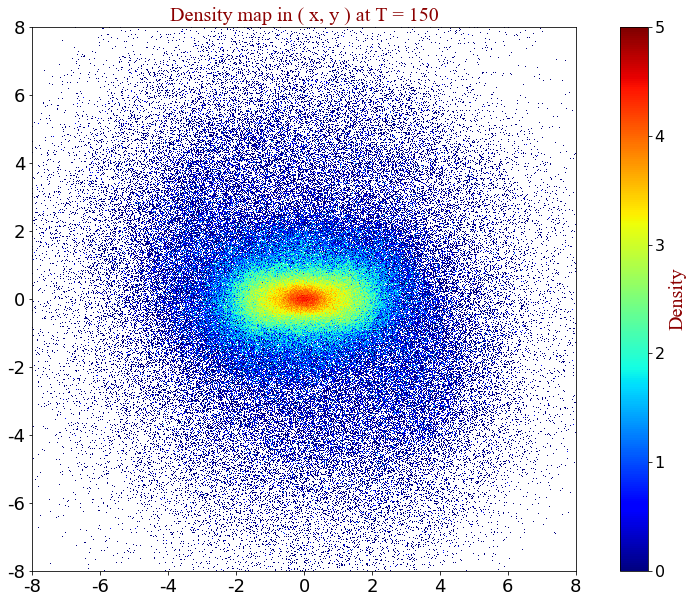

In [8]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap = matplotlib.cm.jet
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#x,y-plane
H,xedges,yedges = np.histogram2d(y,x,bins=(1000,1000),range=([-8,8],[-8,8]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,9))
ax.set_yticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('Density',fontdict=font)
#cbar.set_ticks(np.linspace(-4.5,-0.5,5))
#cbar.set_ticklabels( ('-4.5', '-3.5', '-2.5', '-1.5', '-0.5'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(-4.5,-0.5)

#title
titleStr='Density map in ( x, y ) at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname3='Dens_xy_t'+str(nn)+'.png'
plt.savefig(figname3)